**Información general: con la estructura del lector OCR, para la selección de la información del PDA**

# Contenido
## Lectura de Archivos de PDA

Perfil de idoneidad del Asesor, extraemos información:
![PDA](https://www.pdaprofile.com/App_Themes/images/brand.svg)
# Version Lector de PDF para identificar información relevante del PDA

- Sección 1:
  > - **Parte 1**: Carga del PDF.
  > - **Parte 2**: Verificación del contenido para reconocer el contenido de la página de ***Gráfico Perfil Conductual***.
- Sección 2:
  > - **Parte 1**: Lectura para PDF y reconocer información por medio del lector OCR, con las librerias de ***OCRmyPDF*** y ***Tesseract***. (A continuación se encuentra la explicación de las librerias)
  > - **Parte2**: Realiza la tabulación de la información de cada segmento de la página del PDA en estructura de diccionario.
- Sección 3:
  > - **Parte 1**: Almacenamiento del Diccionario en json, csv u otros formatos.

# Instalar requerimientos

In [3]:
#@title Cargar las librerias a instalar (requerimientos)
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hHUhq-k8_5IxNuxkXQ6NV3G3KK3YuKTo' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1hHUhq-k8_5IxNuxkXQ6NV3G3KK3YuKTo" -O requirements.txt && rm -rf /tmp/cookies.txt
# Instalar requerimientos
!pip install -r requirements.txt
!apt-get install libmagickwand-dev
!apt-get install libtesseract-dev
!apt-get install tesseract-ocr
!apt-get install tesseract-ocr-spa
!apt-get install poppler-utils
!pip install textract
!pip install pdfminer
!apt-get install libxml2 antiword unrtf poppler-utils pstotext flac ffmpeg lame libmad0 libsox-fmt-mp3 sox swig
!apt install unpaper
!apt install pngquant
# !pip install ocrmypdf
!apt-get install libtesseract-dev
!pip install pytesseract
!pip install --upgrade PyPDF2==2.12.1
!pip install PDFplumber==0.9.0
!pip install camelot-py==0.10.1
# !apt-get install ghostscript
!pip install ghostscript==0.7
!pip install textract
!pip install tabula-py
!pip install pdf2image
!pip install PyMuPDF
!apt-get install poppler-utils
!pip install --upgrade ocrmypdf
!pip install subprocess

--2023-12-07 16:37:14--  https://docs.google.com/uc?export=download&confirm=&id=1hHUhq-k8_5IxNuxkXQ6NV3G3KK3YuKTo
Resolving docs.google.com (docs.google.com)... 142.251.2.113, 142.251.2.102, 142.251.2.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-9k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n36h17lcn4pg9spqsv8u1p24kqj1p1if/1701966975000/07198202338059817554/*/1hHUhq-k8_5IxNuxkXQ6NV3G3KK3YuKTo?e=download&uuid=ed8d9af6-ec36-4912-b38f-0e17a2fe030d [following]
--2023-12-07 16:37:14--  https://doc-0g-9k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n36h17lcn4pg9spqsv8u1p24kqj1p1if/1701966975000/07198202338059817554/*/1hHUhq-k8_5IxNuxkXQ6NV3G3KK3YuKTo?e=download&uuid=ed8d9af6-ec36-4912-b38f-0e17a2fe030d
Resolving doc-0g-9k-docs.googleusercontent.com (doc-0g-9k-docs.googleusercontent.com)... 142.251.2.132, 2607:f

# Libreria

In [5]:
#@markdown ---
#@markdown Import modules needed for this project \\
#@markdown Librerías para información o ubicación del puntero del directorio
import os
from os import remove # libreria para remover un archivo
from shutil import rmtree # libreria para remover la carpeta con archivos
from ctypes.util import find_library
import re
import io
from io import StringIO
import sys
#@markdown ---
#@markdown Carga de archivos disponibles
import glob
from tqdm import tqdm_notebook as tqdm
import zipfile # para lectura de datos
from pathlib import Path
import pathlib
import google
from google.colab import files, drive
from functools import reduce # Para aplicar la disminución entre los datos
drive.mount('/content/drive')
#@markdown ---
#@markdown Librerias para la lectura de la información desde
import cv2
import pytesseract
import PyPDF2
from PyPDF2 import PdfFileReader, PdfReader, PdfWriter
from pdf2image import convert_from_bytes, convert_from_path
import tabula as tb
from tabula import read_pdf
import pdfminer
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument, PDFNoOutlines
from pdfminer.pdfpage import PDFPage
from pdfminer.layout import LAParams, LTTextBox, LTTextLine
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfdevice import PDFDevice
from pdfminer.converter import TextConverter
import textract
import pytesseract
import pyocr
import pyocr.builders
import wand
import ocrmypdf
#@markdown ---
#@markdown Librerias para lectura del PDF y pasar a imágen
from PIL import Image as PI
import PIL
from wand.image import Image
from skimage import color
#@markdown ---
#@markdown librerias para almacenamiento de información tabulada
import numpy as np
import pandas as pd
import json
#@markdown ---
#@markdown libreria para verificar versión
import subprocess
#@markdown ---
#@markdown librerias para lectura de datos
import nums_from_string
#@markdown ---
#@markdown Libreria para visualizar una imágen de seser necesario
import matplotlib.pyplot as plt

Mounted at /content/drive


# Enlace de Documentación de las libreria OCR
****
**Open In GitHub: **\
[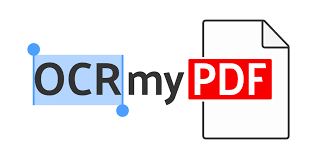](https://github.com/ocrmypdf/OCRmyPDF)

[**ocrmypdf Documentation**](https://ocrmypdf.readthedocs.io/_/downloads/en/v9.1.1/pdf/)

[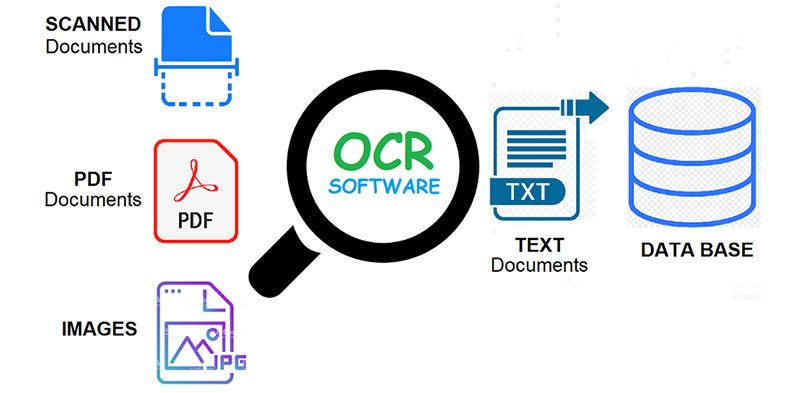](https://github.com/tesseract-ocr/tesseract)

[**tesseract-ocr Documentation**](https://nanonets.com/blog/ocr-with-tesseract/)


*Enlace del cuaderno actual*

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1UMzegy5NzpP5HpLhvBMFMueFPMLWRxkD#scrollTo=Nnh5ZVTr_KzJ&uniqifier=7)

# Verificador de versiones de librerias

In [6]:
# @title verificador 1 de versión de librerías
sub = subprocess.run(["pip", "list", '--disable-pip-version-check'],
                    stdout=subprocess.PIPE,
                    universal_newlines=True
                    )
pkgs = (line.rstrip().split() for line in sub.stdout.split("\n")[2: -1])

for paquete, version in pkgs:
    print(paquete, version)

absl-py 1.4.0
aiohttp 3.9.1
aiosignal 1.3.1
alabaster 0.7.13
albumentations 1.3.1
altair 4.2.2
anyio 3.7.1
appdirs 1.4.4
argcomplete 1.10.3
argon2-cffi 23.1.0
argon2-cffi-bindings 21.2.0
array-record 0.5.0
arviz 0.15.1
astropy 5.3.4
astunparse 1.6.3
async-timeout 4.0.3
atpublic 4.0
attrs 23.1.0
audioread 3.0.1
autograd 1.6.2
Babel 2.13.1
backcall 0.2.0
beautifulsoup4 4.8.2
bidict 0.22.1
bigframes 0.15.0
bleach 6.1.0
blinker 1.4
blis 0.7.11
blosc2 2.0.0
bokeh 3.3.1
bqplot 0.12.42
branca 0.7.0
build 1.0.3
CacheControl 0.13.1
cachetools 5.3.2
camelot-py 0.10.1
catalogue 2.0.10
certifi 2023.11.17
cffi 1.16.0
chardet 3.0.4
charset-normalizer 3.3.2
chex 0.1.7
click 8.1.7
click-plugins 1.1.1
cligj 0.7.2
cloudpickle 2.2.1
cmake 3.27.7
cmdstanpy 1.2.0
colorcet 3.0.1
colorlover 0.3.0
colour 0.1.5
community 1.0.0b1
compressed-rtf 1.0.6
confection 0.1.4
cons 0.4.6
contextlib2 21.6.0
contourpy 1.2.0
cryptography 41.0.7
cufflinks 0.17.3
cupy-cuda11x 11.0.0
cvxopt 1.3.2
cvxpy 1.3.2
cycler 0.12.1
cyme

In [7]:
# @title verificador 2 de versión de librerías
!pip freeze

absl-py==1.4.0
aiohttp==3.9.1
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argcomplete==1.10.3
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.13.1
backcall==0.2.0
beautifulsoup4==4.8.2
bidict==0.22.1
bigframes==0.15.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.1
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
camelot-py==0.10.1
catalogue==2.0.10
certifi==2023.11.17
cffi==1.16.0
chardet==3.0.4
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.7
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
compressed-rtf==1.0.6
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.7
cufflinks==0.17.3
cupy

# Funciones

## Sección 1 ***`Carga y Verificador`***

In [20]:
# @title función de chequeo del archivo
def func_check(input_folder_path, output_folder_path):
  """
    Input: Ubicación del pdf almacenado
      input_folder_path: Ubicación de la ruta donde se aloja el documento PDF con la información del PDA.
      output_folder_path: Indicar la ubicación donde se almacena el archivo PDF ya organizado.
    Output: Retorna la lectura de la información e identificar si el pdf verifica y contiene la información solicitada.
    Info: Contiene la selección la lectura del PDF con la información ya capturada del Gráfico de perfil conductual.
          Versión: 1 Donde se tiene la verificación de la información en la ruta indicada.
    Example:
      input_folder_path = '/content/input_papers/'   #ruta de la ubicación del archivo de PDF
      output_folder_path = '/content/output_papers/' #ruta en donde queda el PDF ya verificado
      func_check(input_folder_path, output_folder_path)
  """
  for file in tqdm(glob.glob(input_folder_path+'/*.pdf')):
    # Aplicación de la función con la segmentación de la página requerida y aplicación del OCR para mejorar lectura posterior del PDF
    filename = os.path.basename(file)
    if not os.path.exists(output_folder_path+filename):
      Output_paper(file, output_folder_path)
  print('Proceso realizado')

In [21]:
#@title Función verificación de la página con la información Fase 1
def Output_paper(file_list, output_folder_path):
  """
    Input:
      file_list: Nombre del archivo pdf que contiene la información del PDA, Gráfico Perfil Conductual
      output_folder_path: Ubicación para almacenar los archivos y Notifica la Página con la información
    Output:
      Output_paper: Almacenamiento del archivo seleccionado y el nombre del archivo
    Info: Contiene  la verificación del PDF
          Versión 1.0: Con ubicación manual
          Versión 2.0: Organizada la ubicación automática del archivo con libreria de google
    Example:
      # @title Lectura de los documentos disponibles en la carpeta
      output_folder_path= "/content/output_papers/"   # ubicación para almacenar archivos para lectura
      for file in tqdm(glob.glob(input_folder_path+'/*.pdf')):
        print(file)
        Output_paper(file, output_folder_path) # Versión 2.0
  """
  temp     = open(file_list, 'rb')
  name_frame= os.path.basename(file_list)
  PDF_read = PdfReader(temp)                    # Lectura del Documento
  N_pag    = PDF_read.numPages                  # Numero de páginas
  string   = 'Gráfico Perfil Conductual'        # Contenido que se realiza la busqueda
  a = 0
  for i in range(N_pag):                        # Verificación de ubicación de la página
    page = PDF_read.pages[i]                    # Selección de la página
    pdfWriter = PyPDF2.PdfWriter()              # Creamos un archivo con la página para validar
    pdfWriter.add_page(page)                    # agregamos la información de la pagina a un nuevo PDF
    Nombre_arch_temporal = 'temporal.pdf'       # nombre del archivo a crear
    with open(output_folder_path+Nombre_arch_temporal, 'wb') as pdfOut:
      pdfWriter.write(pdfOut)                   # escribimos la información de la página
    pdfOut.close()                              # Cerramos el documento
    # Confirmar si es la página con la información
    if string in str(textract.process(output_folder_path+Nombre_arch_temporal, method='pdfminer', lenguage='spa'), 'utf-8').split('\n\n'):
      print('Name Document {} Page with Info: {}'.format(name_frame, i+1))
      try:
        os.remove(output_folder_path+Nombre_arch_temporal) # Almacenar la información requerida
      except:
        print('Error while deleting file: ', Nombre_arch_temporal)
      Nombre_arch_temporal = name_frame         # nombre del archivo a crear prueba con +'_Grafico.pdf'
      with open(output_folder_path+Nombre_arch_temporal, 'wb') as pdfOut:
        pdfWriter.write(pdfOut)                 # escribimos la información de la página
      pdfOut.close()                            # Cerramos el documento
      a = 1
      # break
    else:
      try:
        os.remove(output_folder_path+Nombre_arch_temporal)
      except:
        print('Error while deleting file: ', Nombre_arch_temporal)
  if a == 0:
    print('Error de pdf, no encontrada la información del archivo {}'.format(name_frame))
    print("Importante volver a Cargar archivo {}".format(name_frame))
    # warnings.warn("Importante volver a Cargar archivo {}".format(name_frame))

## Sección 2 ***`Lectura y tabulación de la información`***

In [22]:
# @title Lector OCR con verificación de Datos
def func_OCR(output_folder_path):
  """
    Input: Ubicación del pdf almacenado
      output_folder_path: Indicar la cadena de la caractéres donde se encuentra el pdf verificado para lectura.
    Output: Retorna la lectura de la información luego de aplicar el escaneo y verificación del área relacionado.
    Info: Contiene la selección la lectura del PDF con la información ya capturada del Gráfico de perfil conductual.
          Versión 1: Donde se tiene la carga de la información en la ruta.
    Example:
      input_folder_path = '/content/input_papers/'
      output_folder_path= '/content/output_papers/'
      func_check(input_folder_path, output_folder_path) # Función de chequedo y verificación
      Perfil_final = func_OCR(output_folder_path) # Función de Lectura y Tabulación
  """
  for file in tqdm(glob.glob(output_folder_path+'/*.pdf')):
    filename = os.path.basename(file)
    print("Converting : " + filename)
    input_filename = output_folder_path+filename
    output_filename = output_folder_path_prueba1+filename # Versión 2
    print(output_filename)
    !ocrmypdf -l spa --tesseract-timeout 3 --force-ocr "{input_filename}" "{output_filename}"
  # Extraer información del PDF convirtiendo PDF a Imagen (Imagen en pixeles).
  Perfil, image, image2 = Extract_text_from_pdf(output_folder_path_prueba1) # retorna información de Perfil lectura inicial, Imagen con 200 DPI, imagen2 con 300 DPI.
  # Tabulación de la información y entrega en diccionario.
  Perfil_final = Function_reading_data_pdf(Perfil, image, image2) # Tabulación de la información luego de la lectura.
  return Perfil_final

In [23]:
#@title Función para lectura del pdf preprocesado por el OCR Fase 3 Versión 2
def Extract_text_from_pdf(pdf_path, Save_txt=False):
  """
    Input:
      pdf_path: String (str), Contiene la dirección y nombre del archivos PDF,
      que se va a utilizar.
      Save_txt: Bool, True or False, para almacenar la información extraida
    Output:
      text_data: String (str), Contiene la información del PDF indicado.
    Info:
      In the above code, we first convert the PDF file to a sequence of images using pdf2image. Then, we used PyTesseract to perform OCR on each image and extracted the text. In the end, all of the extracted text was concatenated and returned as a single string.
      Tesseract is a powerful tool that can be used to extract text from images and PDFs in Python. We saw how to use PyTesseract to perform OCR on an image and extract text from it. We also learned how to use pdf2image to convert a PDF file to a sequence of images and then use PyTesseract to extract text from each image.
      Versión: 1.0 Con la lectura de cada texto con la información relacionada.
      Versión: 2.0 Lectura con la estructura textract con formato de salida en DataFrame.
    Example:
      output_folder_path = '/content/output_papers/'
      Data = Extract_text_from_pdf(output_folder_path, False)
  """
  # Lectura de la información de la información de forma automática.
  # Almacenar la información por la
  Perfil = pd.DataFrame(columns=["file_id", "content"])
  custom_config = r'--oem 3 --psm 6 -l spa'
  img_ = list()
  img_2 = list()
  for file in tqdm(glob.glob(pdf_path+'/*.pdf')):
    # Lectura de información general
    print('Lectura del archivo: {}'.format(file))
    filename  = os.path.basename(file)
    file_name = pdf_path+filename
    # Lectura del perfil Normal y Adaptado
    print(filename)
    pages = convert_from_path(file)
    pages_= convert_from_path(file, dpi=300)
    # for i in range(len(pages)):
    # Guardar página como imagen
    # plt.imshow(pages[0])
    pages[0].save(output_folder_path_+filename[:-4]+'.jpg', 'JPEG', )
    pages_[0].save(output_folder_path_+filename[:-4]+'_v2.jpg', 'JPEG', dpi=(300, 300))
    img = cv2.imread(output_folder_path_+filename[:-4]+'.jpg')
    img2= cv2.imread(output_folder_path_+filename[:-4]+'_v2.jpg')
    gray = get_grayscale(img)
    Data = pytesseract.image_to_string(gray, config=custom_config, lang='spa')
    # Almacenamiento de la información respecto al desarrollo
    temporl = pd.DataFrame({"file_id": filename, "content": [Data]})
    Perfil = pd.concat([Perfil, temporl], axis=0, ignore_index=True)
    # remove(output_folder_path_+filename[:-4]+'.jpg')
    # remove(output_folder_path_+filename[:-4]+'_v2.jpg')
    if Save_txt: # Almacenamiento de cada archivo en un txt como copia de la información.
      filename  = filename.replace('pdf', 'txt') # reemplazo
      # print('Almacenado en: {}, con nombre: {}'.format(output_folder_path_, filename))
      with open (file_name, 'w', encoding = 'utf-8') as f:
        f.write(Data)
    img_.append(img)
    img_2.append(img2)
  # Return the text data
  return Perfil, img_, img_2

In [24]:
# @title Función para limpieza y para lectura del pdf preprocesado por el OCR Fase 3 en selección cada área Versión 3
def fnc_clear_extract(image_correct, section='Nartural', type_='Perfil'):
  """
    Input:
      image_correct: Contiene la imagen cargada que contiene la información relacionado con el perfil conductual.
      section: String: Contiene cadena de caractéres con la sección que quiere ver de la Hoja.
              Default: ['Natural'], donde puede seleccionar ['Natural', 'Adaptado' o 'General'].
      type: String: Contiene cadena de caractéres con la selección del tipo de información solicitada.
          Para 'Normal' y 'Adaptado' seria: ['Perfil', '#', 'IE', 'Toma', 'Intensidad', 'Energía'].
          Para 'General' seria: ['Equilibrio', 'Modificación', 'Tiempo']
          Default: ['Perfil']
    Output:
    Info: Por medio de la lectura del área en específico permite una limpieza y quitar ruido de la lectura del texto.
          Version: 1.0 Realiza la lectura de la información en el área asignado.
    Example:
      doc = r'/content/output_papers_/ReportePDA_AndreaValenciaOcampo_v2.jpg'
      image1 = cv2.imread(doc)
      fnc_clear_extract(image1, 'Nartural', 'Perfil')
  """
  # Información de la sección Natural
  if section == 'Natural':
    lista_normal = [
        [(330, 1235), (610, 1265)], # Valor
        [(330, 1282), (610, 1312)], # #
        [(315, 1320), (620, 1350)], # IE
        [(250, 1490), (590, 1520)], # Toma de dicisiones
        [(250, 1622), (590, 1652)], # Intensidad de perfil
        [(250, 1756), (590, 1786)], # Energía Normal
        ]

    lista_normal_per = [[(490, 1855), (560, 1900)], # R
                        [(580, 1855), (650, 1900)], # E
                        [(670, 1855), (740, 1900)], # P
                        [(760, 1855), (830, 1900)], # N
                        [(850, 1855), (910, 1900)],]# A

    lista_normal_num = [[(325, 1282), (375, 1312)], # R
                        [(385, 1282), (435, 1312)], # E
                        [(445, 1282), (495, 1312)], # P
                        [(505, 1282), (555, 1312)], # N
                        [(565, 1282), (615, 1312)],]# A

    if type_ == 'Perfil': # selección de información de velor del perfíl
      txt = list()
      for pos in range(5):
        c = lista_normal_per[pos]
        cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
        # gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2HSV)
        gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.bilateralFilter(gry_img, 20, 75, 75)#(5, 5), 0)
        thresh = cv2.adaptiveThreshold(blurred, 200, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY_INV, 11, 0)
        txt.append(pytesseract.image_to_string(thresh, config='--psm 6',) )
        # print(nums_from_string.get_nums(txt))
        # plt.imshow(blurred)
      txt = ' '.join(txt)
      # print(txt)
      # print(nums_from_string.get_nums(txt))
      # c = lista_normal[0]
      # # print(c)
      # cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
      # # gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
      # # # thresh = cv2.adaptiveThreshold(gry_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 0)
      # # border_img = cv2.copyMakeBorder(gry_img, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=255)
      # # plt.imshow(border_img)
      # # txt = pytesseract.image_to_string(border_img, config='--psm 6')
      # gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
      # blurred = cv2.bilateralFilter(gry_img, 2, 100, 100)#(5, 5), 0)
      # thresh = cv2.adaptiveThreshold(blurred, 100, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 0)
      # # thresh = cv2.adaptiveThreshold(gry_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 21)
      # border_img = cv2.copyMakeBorder(thresh, 3, 3, 3, 3, cv2.BORDER_CONSTANT, value=100)
      # txt = pytesseract.image_to_string(border_img, config='--psm 6',) #config='--psm 6')
      # if (np.asarray([int(str(np.abs(i)).replace('0.', '')) for i in nums_from_string.get_nums(txt)])>100).sum() > 0:
      #   blurred = cv2.GaussianBlur(gry_img, (5, 5), 1)
      #   thresh = cv2.adaptiveThreshold(blurred, 100, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
      #   border_img = cv2.copyMakeBorder(thresh, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=250)
      #   txt = pytesseract.image_to_string(border_img, config='--psm 6',) #config='--psm 6')
      #   txt = txt.replace('O ', '0 ')
      #   txt = txt.replace(' O', ' 0')
      #   txt = txt.replace('O-', '0-')
      # print(txt)
    elif type_ == '#':  # valor de la información del número
      txt = list()
      for pos in range(5):
        c = lista_normal_num[pos]
        cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
        gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.bilateralFilter(gry_img, 2, 100, 100) # (5, 5), 0)
        thresh = cv2.adaptiveThreshold(gry_img, 50, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)
        border_img = cv2.copyMakeBorder(thresh, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=250)
        txt.append(pytesseract.image_to_string(border_img, config='--psm 6'))
        # print(txt)
      txt = ' '.join(txt)
      if len(nums_from_string.get_nums(txt))<5:
        txt = list()
        for pos in range(5):
          c = lista_normal_num[pos]
          cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
          gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
          blurred = cv2.bilateralFilter(gry_img, 9, 75, 75) # (5, 5), 0)
          thresh = cv2.adaptiveThreshold(blurred, 10, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 4)
          # border_img = cv2.copyMakeBorder(thresh, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=250)
          border_img = cv2.copyMakeBorder(thresh, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=200)
          txt.append(pytesseract.image_to_string(border_img, config='--oem 3 --psm 6 -l spa',)) #config='--psm 6')
          # plt.figure()
          # plt.imshow(border_img)
        txt = ' '.join(txt)
      # c = lista_normal[1]
      # cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
      # gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
      # blurred = cv2.bilateralFilter(gry_img, 2, 100, 100) # (5, 5), 0)
      # thresh = cv2.adaptiveThreshold(gry_img, 50, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)
      # border_img = cv2.copyMakeBorder(thresh, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=250)
      # txt = pytesseract.image_to_string(border_img, config='--psm 6')
      # thresh = cv2.adaptiveThreshold(blurred, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
      # border_img = cv2.copyMakeBorder(thresh, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=240)
      # txt = pytesseract.image_to_string(border_img, config='--psm 6')
      # if [int(str(np.abs(i)).replace('0.', '')) for i in nums_from_string.get_nums(txt)]==[]:
      #   thresh = cv2.adaptiveThreshold(blurred, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
      #   border_img = cv2.copyMakeBorder(thresh, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=255)
      #   txt = pytesseract.image_to_string(border_img, config='--psm 6')
      # elif len([int(str(np.abs(i)).replace('0.', '')) for i in nums_from_string.get_nums(txt)]) < 5:
      #   # blurred = cv2.medianBlur(gry_img, 5) #9,20,20)#(5, 5), 0)
      #   thresh = cv2.adaptiveThreshold(gry_img, 50, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)
      #   border_img = cv2.copyMakeBorder(thresh, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=250)
      #   txt = pytesseract.image_to_string(border_img, config='--psm 6')
      # print(nums_from_string.get_nums(txt))
      # plt.imshow(border_img)
    elif type_ == 'IE': # Valor de intensidad del EJE
      c = lista_normal[2]
      cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
      gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
      # thresh = cv2.adaptiveThreshold(gry_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 21)
      # border_img = cv2.copyMakeBorder(gry_img, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=255)
      txt = pytesseract.image_to_string(gry_img, config='--psm 3')
    elif type_ == 'Toma': # Valor Toma de decisiones
      c = lista_normal[3]
      cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
      gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
      # thresh = cv2.adaptiveThreshold(gry_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 21)
      border_img = cv2.copyMakeBorder(gry_img, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=255)
      txt = pytesseract.image_to_string(border_img, config='--psm 6')
    elif type_ == 'Intensidad': # Valor de Intendad
      c = lista_normal[4]
      cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
      gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
      # thresh = cv2.adaptiveThreshold(gry_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 21)
      border_img = cv2.copyMakeBorder(gry_img, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=255)
      txt = pytesseract.image_to_string(border_img, config='--psm 6')
    elif type_ == 'Energía': # valor de energía natural
      c = lista_normal[5]
      cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
      gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
      # thresh = cv2.adaptiveThreshold(gry_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 21)
      border_img = cv2.copyMakeBorder(gry_img, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=255)
      txt = pytesseract.image_to_string(border_img, config='--psm 6')
  # Información de la sección Adaptado
  elif section == 'Adaptado':
    lista_adaptado = [[(1045, 1235), (1325, 1265)], # Valor
                      [(1045, 1282), (1325, 1312)], # #
                      [(1030, 1320), (1335, 1350)], # IE
                      [(975, 1490), (1315, 1520)], # Toma de dicisiones
                      [(975, 1622), (1315, 1652)], # Intensidad de perfil
                      [(975, 1756), (1315, 1786)],] # Energía Normal

    lista_adapta_per = [[(1560, 1855), (1630, 1900)], # R
                        [(1650, 1855), (1720, 1900)], # E
                        [(1740, 1855), (1820, 1900)], # P
                        [(1830, 1855), (1910, 1900)], # N
                        [(1920, 1855), (1990, 1900)],]# A

    lista_adapta_num = [[(1035, 1282), (1095, 1312)], # R
                        [(1100, 1282), (1150, 1312)], # E
                        [(1160, 1282), (1210, 1312)], # P
                        [(1215, 1282), (1270, 1312)], # N
                        [(1280, 1282), (1340, 1312)],]# A

    if type_ == 'Perfil': # selección de información de velor del perfíl
      txt = list()
      for pos in range(5):
        c = lista_adapta_per[pos]
        cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
        # gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2HSV)
        gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gry_img, (5, 5), 0)
        # blurred = cv2.bilateralFilter(gry_img, 4, 80, 80) #(5, 5), 0)
        thresh = cv2.adaptiveThreshold(blurred, 100, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY_INV, 11, 0)
        if nums_from_string.get_nums(pytesseract.image_to_string(thresh, config='--psm 6',) ) == []:
          txt.append(pytesseract.image_to_string(thresh, config='--psm 6',).replace('O', '0') )
        else:
          txt.append(pytesseract.image_to_string(thresh, config='--psm 6',) )
        # print(txt)
        # plt.figure()
        # print(nums_from_string.get_nums(txt))
        # plt.imshow(thresh)
      txt = ' '.join(txt)
      if len(nums_from_string.get_nums(txt))<5:
        txt = list()
        for pos in range(5):
          c = lista_adapta_per[pos]
          cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
          gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
          blurred = cv2.bilateralFilter(gry_img, 9, 75, 75) # (5, 5), 0)
          thresh = cv2.adaptiveThreshold(blurred, 10, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 0)
          # border_img = cv2.copyMakeBorder(thresh, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=250)
          border_img = cv2.copyMakeBorder(thresh, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=200)
          txt.append(pytesseract.image_to_string(border_img, config='--psm 6',)) #config='--psm 6')
          # plt.figure()
          # plt.imshow(border_img)
      txt = ' '.join(txt)

      # c = lista_adaptado[0]
      # cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
      # # blue = cropped_image[:, :, 1]
      # gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
      # blurred = cv2.bilateralFilter(gry_img, 5, 100, 100)#(5, 5), 0)
      # thresh = cv2.adaptiveThreshold(blurred, 100, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 0)
      # # thresh = cv2.adaptiveThreshold(gry_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 21)
      # border_img = cv2.copyMakeBorder(thresh, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=255)
      # # a = thresh
      # txt = pytesseract.image_to_string(border_img, config='--psm 6',) #config='--psm 6')
      # if [int(str(np.abs(i)).replace('0.', '')) for i in nums_from_string.get_nums(txt)]==[]:
      #   blurred = cv2.GaussianBlur(gry_img, (5, 5), 0)
      #   thresh = cv2.adaptiveThreshold(blurred, 100, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 0)
      #   border_img = cv2.copyMakeBorder(thresh, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=250)
      #   txt = pytesseract.image_to_string(border_img, config='--psm 6',) #config='--psm 6')
      # # plt.imshow(border_img)
      # txt = txt.replace('O ', '0 ')
      # txt = txt.replace('O-', '0-')
    elif type_ == '#':  # valor de la información del número
      txt = list()
      for pos in range(5):
        c = lista_adapta_num[pos]
        cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
        gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.bilateralFilter(gry_img, 2, 100, 100) # (5, 5), 0)
        thresh = cv2.adaptiveThreshold(gry_img, 50, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)
        border_img = cv2.copyMakeBorder(thresh, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=250)
        txt.append(pytesseract.image_to_string(border_img, config='--psm 6'))
        # print(txt)
      txt = ' '.join(txt)
      if len(nums_from_string.get_nums(txt))<5:
        txt = list()
        for pos in range(5):
          c = lista_adapta_num[pos]
          cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
          gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
          blurred = cv2.bilateralFilter(gry_img, 5, 75, 75) # (5, 5), 0)
          thresh = cv2.adaptiveThreshold(blurred, 100, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 4)
          # border_img = cv2.copyMakeBorder(thresh, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=250)
          border_img = cv2.copyMakeBorder(thresh, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=200)
          txt.append(pytesseract.image_to_string(border_img, config='--oem 3 --psm 6 -l spa',)) #config='--psm 6')
          # plt.figure()
          # plt.imshow(border_img)
      txt = ' '.join(txt)
          # plt.figure()
          # plt.imshow(border_img)

      # c = lista_adaptado[1]
      # cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
      # gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
      # blurred = cv2.bilateralFilter(gry_img, 4, 100, 100) # (5, 5), 0)
      # thresh = cv2.adaptiveThreshold(blurred, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 3)
      # # thresh = cv2.adaptiveThreshold(gry_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 21)
      # border_img = cv2.copyMakeBorder(thresh, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=150)
      # # a = thresh
      # # plt.imshow(border_img)
      # txt = pytesseract.image_to_string(border_img, config=r'--psm 6 --oem 3') #config='--psm 6')
    elif type_ == 'IE': # Valor de intensidad del EJE
      c = lista_adaptado[2]
      cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
      gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
      # thresh = cv2.adaptiveThreshold(gry_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 21)
      # border_img = cv2.copyMakeBorder(gry_img, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=255)
      txt = pytesseract.image_to_string(gry_img, config='--psm 6')
    elif type_ == 'Toma': # Valor Toma de decisiones
      c = lista_adaptado[3]
      cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
      gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
      # thresh = cv2.adaptiveThreshold(gry_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 21)
      border_img = cv2.copyMakeBorder(gry_img, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=255)
      txt = pytesseract.image_to_string(border_img, config='--psm 6')
    elif type_ == 'Intensidad': # Valor de Intendad
      c = lista_adaptado[4]
      cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
      gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
      # thresh = cv2.adaptiveThreshold(gry_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 21)
      border_img = cv2.copyMakeBorder(gry_img, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=255)
      txt = pytesseract.image_to_string(border_img, config='--psm 6')
    elif type_ == 'Energía': # valor de energía natural
      c = lista_adaptado[5]
      cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
      gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
      # thresh = cv2.adaptiveThreshold(gry_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 21)
      border_img = cv2.copyMakeBorder(gry_img, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=255)
      txt = pytesseract.image_to_string(border_img, config='--psm 6')
  # Información de la sección General
  elif section == 'General':
    lista_general = [
      [(680, 1922), (1030, 1952)], # Equilibrio de energía
      [(680, 2052), (1030, 2082)], # Modificación de perfil
      [(680, 2179), (1030, 2209)], # Tiempo de formulario
      ]
    if type_ == 'Equilibrio':
      c = lista_general[0]
      cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
      gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
      # thresh = cv2.adaptiveThreshold(gry_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 21)
      border_img = cv2.copyMakeBorder(gry_img, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=255)
      txt = pytesseract.image_to_string(border_img, config='--psm 6')
    if type_ == 'Modificación':
      c = lista_general[1]
      cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
      gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
      # thresh = cv2.adaptiveThreshold(gry_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 21)
      border_img = cv2.copyMakeBorder(gry_img, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=255)
      txt = pytesseract.image_to_string(border_img, config='--psm 6')
      # print(txt)
      # plt.imshow(border_img)
    if type_ == 'Tiempo':
      c = lista_general[2]
      cropped_image = image_correct[c[0][1]:c[1][1], c[0][0]:c[1][0]]
      gry_img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
      # thresh = cv2.adaptiveThreshold(gry_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 21)
      border_img = cv2.copyMakeBorder(gry_img, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=255)
      txt = pytesseract.image_to_string(border_img, config='--psm 6')
  return [int(str(np.abs(i)).replace('0.', '')) for i in nums_from_string.get_nums(txt)]

In [25]:
# @title Función para identificar la información luego de extraer datos del PDF Fase 3.1
def Search_data_pdf(Text1, type_, form):
  """
    Input:
      Text: List[], Con la información de la base de datos que nos permite
      form: String ['General', 'NATURAL', 'ADAPTADO'], Información .
      type_: String ['Reporte', 'Equilibrio de ', ...], corresponde a cada tipo de datos, según la lectura de datos en la información.
    Output:
      Data: int o String, Información extraida del PDF
    Version: 3.0
    Example:
      Text1.append(Extract_text_from_pdf(output_folder_path_+filename))
      Text1 = pd.DataFrame(Text1, columns=["Información"])
      form  = 'Reporte'
      type_ = 'General'
      Search_data(Text1, form, type_)
  """
  lista_pru = Text1.split('\n') # lista con la información del PDF para sección de valores por tipo Natural y Adaptado.

  # Sección General
  if form == 'General':
    if type_ == 'Reporte': # sección reporte
      Data = list(filter(lambda x: 'Reporte' in x, lista_pru))[0].replace('| ', '')
    elif type_ == 'Nombre del agente': # nombre del agente
      Data = lista_pru[[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Reporte' in x, lista_pru))[0]][0]+1].replace('PD) $9 ', '')
    elif type_ == 'Equilibrio de': # Valor de
      Data = nums_from_string.get_nums(''.join(list(filter(lambda x: '%' in x, lista_pru[[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Equilibrio de' in x, lista_pru))[0]][0]+1:[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Modifica' in x, lista_pru))[0]][0]]))[0]))[0]
    elif type_ == 'Modifica':
      Data = nums_from_string.get_nums(''.join(lista_pru[[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Modifica' in x, lista_pru))[0]][0]+1:[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Tiempo ' in x, lista_pru))[0]][0]]))[0]
      Data = int(str(Data).replace('0.', ''))
    elif type_ == 'Tiempo ':
      Data = nums_from_string.get_nums(''.join(lista_pru[[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Tiempo del Formulario' in x, lista_pru))[0]][0]:[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: ' PDA International' in x, lista_pru))[0]][0]]))[0]

  # Sección NATURAL
  elif form == 'NATURAL':
    if type_ == 'Numero':
      Data = nums_from_string.get_nums(''.join(lista_pru[[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'REPNA' in x, lista_pru))[0]][0]+1].replace('.',' ')))[:5]
    elif type_ == 'IE':
      Data = nums_from_string.get_nums(''.join(lista_pru[[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'IE' in x, lista_pru))[0]][0]]))[:5]
    elif type_ == 'Toma de':
      Data = nums_from_string.get_nums(''.join(lista_pru[[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Toma de Decisiones' in x, lista_pru))[0]][0]:[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Intensidad del Perfil' in x, lista_pru))[0]][0]]))[1]
    elif type_ == 'Intensidad del':
      Data = np.abs(nums_from_string.get_nums(''.join(lista_pru[[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Intensidad del Perfil' in x, lista_pru))[0]][0]:[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Energía Energía' in x, lista_pru))[0]][0]]))[0])
    elif type_ == 'Energía E':
      try:
        Data = np.abs(nums_from_string.get_nums((''.join(list(filter(lambda x: '%' in x, lista_pru[[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Energía Energía' in x, lista_pru))[0]][0]+1:[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Equilibrio de ' in x, lista_pru))[0]][0]])))).split(' ')[0])[0])
      except:
        Data = 0

  # Sección ADAPTADO
  elif form == 'ADAPTADO':
    if type_ == 'Numero':
      Data = nums_from_string.get_nums(''.join(lista_pru[[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'REPNA' in x, lista_pru))[0]][0]+1].replace('.',' ')))[5:]
    elif type_ == 'IE':
      Data = nums_from_string.get_nums(''.join(lista_pru[[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'IE' in x, lista_pru))[0]][0]]))[5:]
    elif type_ == 'Toma de':
      try:
        Data = nums_from_string.get_nums(''.join(lista_pru[[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Toma de Decisiones' in x, lista_pru))[0]][0]:[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Intensidad del Perfil' in x, lista_pru))[0]][0]]))[2]
      except:
        Data = 0
    elif type_ == 'Intensidad del':
      Data = np.abs(nums_from_string.get_nums(''.join(lista_pru[[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Intensidad del Perfil' in x, lista_pru))[0]][0]:[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Energía Energía' in x, lista_pru))[0]][0]]))[1])
    elif type_ == 'Energía E':
      # print(lista_pru)
      try:
        Data = np.abs(nums_from_string.get_nums((''.join(list(filter(lambda x: '%' in x, lista_pru[[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Energía Energía' in x, lista_pru))[0]][0]+1:[i for i, e in enumerate(lista_pru) if e == list(filter(lambda x: 'Equilibrio de ' in x, lista_pru))[0]][0]])))).split(' ')[1])[0])
      except:
        Data = 0

  # print("Dato de {} en {} con el dato de: {}".format(form, type_, Data))
  # if len([Data])==1:
  #   Data = np.abs(Data)
  # print(Data)
  return Data # Dato solicitado del PDF cargado

In [26]:
# @title función para la conversión de colores en la imágen
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [27]:
# @title Función para identificar la información luego de extraer datos del PDF y realizar la tabulación para entrega en diccionario Fase 3.2 versión 2
def Function_reading_data_pdf(Perfil, image1, image2):
  """
    Input: contiene una cadena de caracteres en formato texto o txt (String)
          texto de la información del PDA.
          Perfil: String, PDF lectura 1.
          image1: Contiene la información de la imágen con información del PDA con dpi en 200
          image2: Contiene la información de la imágen con información del PDA con dpi en 300
    Output: Diccionario_perfil: retorna un diccionario con la información organizada,
            retorna un diccionario con la informción organizada para su almacenamiento
            Version: 1.0 Lectura de un solo texto.
            Version: 2.0 lectura del texto extraido con versión de ocrmypdf para ambos textos.
            Version: 2.1 lectura del texto en busqueda de información con mayor volumen y con un sola estructura de lectura.
            Version: 2.2 Lectura de la información del perfil con selección del área
    Example:
      Perfil, image, imagen2   = Extract_text_from_pdf(output_folder_path_prueba1) # realiza la extracción de la información
      Diccionario_perfil_final = Function_reading_data_pdf(Perfil, image, imagen2)
  """
  Diccionario_perfil_final = list()
  # print(Perfil.shape[0])
  for i in range(Perfil.shape[0]):
    Text1 = Perfil['content'][i]
    # Información General
    Nombre_del_asesor  = Search_data_pdf(Text1, 'Nombre del agente', 'General')
    Equilibrio_energia = Search_data_pdf(Text1, 'Equilibrio de', 'General')
    Modifi_perfil      = fnc_clear_extract(image1[i], 'General', 'Modificación')
    Tiempo_formulario  = Search_data_pdf(Text1, 'Tiempo ', 'General')

    # Perfil Natural - Información
    Perfil_nat_num     = fnc_clear_extract(image2[i], 'Natural', 'Perfil') # Search_data_pdf(Text1, 'Perfil', 'NATURAL')
    Perfil_nat_dat     = fnc_clear_extract(image1[i], 'Natural', '#') # Search_data_pdf(Text1, 'Numero', 'NATURAL')
    Perfil_nat_IE      = fnc_clear_extract(image1[i], 'Natural', 'IE') #Search_data_pdf(Text1, 'IE', 'NATURAL')
    Toma_nat_deci      = fnc_clear_extract(image1[i], 'Natural', 'Toma') # Search_data_pdf(Text1, 'Toma de', 'NATURAL')
    Inten_nat_perf     = fnc_clear_extract(image1[i], 'Natural', 'Intensidad') # Search_data_pdf(Text1, 'Intensidad del', 'NATURAL')
    Energía_nat        = fnc_clear_extract(image1[i], 'Natural', 'Energía') # Search_data_pdf(Text1, 'Energía E', 'NATURAL')

    # Perfil Adaptado - Información
    Perfil_adap_num    = fnc_clear_extract(image2[i], 'Adaptado', 'Perfil') # Search_data_pdf(Text1, 'Perfil', 'ADAPTADO')
    Perfil_adap_dat    = fnc_clear_extract(image1[i], 'Adaptado', '#') # Search_data_pdf(Text1, 'Numero', 'ADAPTADO')
    Perfil_adap_IE     = Search_data_pdf(Text1, 'IE', 'ADAPTADO')
    Toma_adap_deci     = fnc_clear_extract(image1[i], 'Adaptado', 'Toma') # Search_data_pdf(Text1, 'Toma de', 'ADAPTADO')
    Inten_adap_perf    = fnc_clear_extract(image1[i], 'Adaptado', 'Intensidad') # Search_data_pdf(Text1, 'Intensidad del', 'ADAPTADO')
    Energía_adap       = fnc_clear_extract(image1[i], 'Adaptado', 'Energía') # Search_data_pdf(Text1, 'Energía E', 'ADAPTADO')

    Columnas_ = ['Nombre Asesor',
                 'Perfil Natural R', 'Perfil Natural E', 'Perfil Natural P', 'Perfil Natural N', 'Perfil Natural A',
                 'Perfil Natural R#', 'Perfil Natural E#', 'Perfil Natural P#', 'Perfil Natural N#', 'Perfil Natural A#',
                 'Perfil Natural R_IE', 'Perfil Natural E_IE', 'Perfil Natural P_IE', 'Perfil Natural N_IE', 'Perfil Natural A_IE',
                 'Toma decisiones Natural', 'Intensidad Perfil Natural', 'Energia Natural',
                 'Perfil Adaptado R', 'Perfil Adaptado E', 'Perfil Adaptado P', 'Perfil Adaptado N', 'Perfil Adaptado A',
                 'Perfil Adaptado R#', 'Perfil Adaptado E#', 'Perfil Adaptado P#', 'Perfil Adaptado N#', 'Perfil Adaptado A#',
                 'Perfil Adaptado R_IE', 'Perfil Adaptado E_IE', 'Perfil Adaptado P_IE', 'Perfil Adaptado N_IE', 'Perfil Adaptado A_IE',
                 'Toma decisiones Adaptado', 'Intensidad Perfil Adaptado', 'Energia Adaptado',
                 'Equilibrio de Energia', 'Modificacion perfil', 'Tiempo Formulario']

    # Tabulación
    Diccionario_perfil = dict()
    for i in Columnas_:
      if i == 'Nombre Asesor':
        Diccionario_perfil[i] = Nombre_del_asesor
      elif i == 'Perfil Natural R':
        if len(Perfil_nat_num) >=4:
          Diccionario_perfil[i] = Perfil_nat_num[0]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Natural E':
        if len(Perfil_nat_num) >=4:
          Diccionario_perfil[i] = Perfil_nat_num[1]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Natural P':
        if len(Perfil_nat_num) >=4:
          Diccionario_perfil[i] = Perfil_nat_num[2]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Natural N':
        if len(Perfil_nat_num) >=4:
          Diccionario_perfil[i] = Perfil_nat_num[3]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Natural A':
        if len(Perfil_nat_num) == 5:
          Diccionario_perfil[i] = Perfil_nat_num[4]
        else:
          Diccionario_perfil[i] = 0

      elif i == 'Perfil Natural R#':
        if Perfil_nat_dat !=0:
          Diccionario_perfil[i] = Perfil_nat_dat[0]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Natural E#':
        if Perfil_nat_dat !=0:
          Diccionario_perfil[i] = Perfil_nat_dat[1]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Natural P#':
        if Perfil_nat_dat !=0:
          Diccionario_perfil[i] = Perfil_nat_dat[2]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Natural N#':
        if Perfil_nat_dat !=0:
          Diccionario_perfil[i] = Perfil_nat_dat[3]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Natural A#':
        if Perfil_nat_dat !=0:
          Diccionario_perfil[i] = Perfil_nat_dat[4]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Natural R_IE':
            Diccionario_perfil[i] = Perfil_nat_IE[0]
      elif i == 'Perfil Natural E_IE':
            Diccionario_perfil[i] = Perfil_nat_IE[1]
      elif i == 'Perfil Natural P_IE':
            Diccionario_perfil[i] = Perfil_nat_IE[2]
      elif i == 'Perfil Natural N_IE':
            Diccionario_perfil[i] = Perfil_nat_IE[3]
      elif i == 'Perfil Natural A_IE':
            Diccionario_perfil[i] = Perfil_nat_IE[4]
      elif i == 'Toma decisiones Natural':
        Diccionario_perfil[i] = Toma_nat_deci[0]
      elif i == 'Intensidad Perfil Natural':
        Diccionario_perfil[i] = Inten_nat_perf[0]
      elif i == 'Energia Natural':
        Diccionario_perfil[i] = Energía_nat[0]
      elif i == 'Perfil Adaptado R':
        Diccionario_perfil[i] = Perfil_adap_num[0]
      elif i == 'Perfil Adaptado E':
        Diccionario_perfil[i] = Perfil_adap_num[1]
      elif i == 'Perfil Adaptado P':
        Diccionario_perfil[i] = Perfil_adap_num[2]
      elif i == 'Perfil Adaptado N':
        Diccionario_perfil[i] = Perfil_adap_num[3]
      elif i == 'Perfil Adaptado A':
        Diccionario_perfil[i] = Perfil_adap_num[4]
      elif i == 'Perfil Adaptado R#':
        if len(Perfil_adap_dat) > 1:
          Diccionario_perfil[i] = Perfil_adap_dat[0]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Adaptado E#':
        if len(Perfil_adap_dat) > 2:
          Diccionario_perfil[i] = Perfil_adap_dat[1]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Adaptado P#':
        if len(Perfil_adap_dat) > 3:
          Diccionario_perfil[i] = Perfil_adap_dat[2]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Adaptado N#':
        if len(Perfil_adap_dat) > 4:
          Diccionario_perfil[i] = Perfil_adap_dat[3]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Adaptado A#':
        if len(Perfil_adap_dat) ==5:
          Diccionario_perfil[i] = Perfil_adap_dat[4]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Adaptado R_IE':
        if Perfil_adap_IE !=0:
          Diccionario_perfil[i] = Perfil_adap_IE[0]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Adaptado E_IE':
        if Perfil_adap_IE !=0:
          Diccionario_perfil[i] = Perfil_adap_IE[1]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Adaptado P_IE':
        if Perfil_adap_IE !=0:
          Diccionario_perfil[i] = Perfil_adap_IE[2]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Adaptado N_IE':
        if Perfil_adap_IE !=0:
          Diccionario_perfil[i] = Perfil_adap_IE[3]
        else:
          Diccionario_perfil[i] = 0
      elif i == 'Perfil Adaptado A_IE':
        if Perfil_adap_IE !=0:
            Diccionario_perfil[i] = Perfil_adap_IE[4]
        else:
            Diccionario_perfil[i] = 0
      elif i == 'Toma decisiones Adaptado':
        Diccionario_perfil[i] = Toma_adap_deci[0]
      elif i == 'Intensidad Perfil Adaptado':
        Diccionario_perfil[i] = Inten_adap_perf[0]
      elif i == 'Energia Adaptado':
        Diccionario_perfil[i] = Energía_adap[0]
      elif i == 'Equilibrio de Energia':
        Diccionario_perfil[i] = Equilibrio_energia
      elif i == 'Modificacion perfil':
        Diccionario_perfil[i] = Modifi_perfil[0]
      elif i == 'Tiempo Formulario':
        Diccionario_perfil[i] = Tiempo_formulario
        Diccionario_perfil['Unidad tiempo'] = 'min'

    # Agregar el color de la información ---- comentada temporalmente
    # Extraer información asociación de colores PDA
    # if len(Perfil_nat_IE) == 5:
    #   Color, Nombre_perfil, Eje_dominante, Perfil = func_color_dominant(Perfil_nat_num)
    # else:
    #   Color = 'Sin definir'
    #   Nombre_perfil = 'Sin definir'
    #   Eje_dominante= 'Sin definir'
    #   Perfil = 'Sin definir'
    # Diccionario_perfil['Color'] = Color
    # Diccionario_perfil['Nombre_perfil'] = Nombre_perfil
    # Diccionario_perfil['Eje_dominante'] = Eje_dominante
    # Diccionario_perfil['Perfil'] = Perfil

    Diccionario_perfil_final.append(Diccionario_perfil)

  return Diccionario_perfil_final # retorna la información relacionada

In [28]:
#@title Función de selección del color respecto al PDA
# Selección del color
def func_color_dominant(Perfil_nat_num):
  if reduce(lambda x,y: x-y, np.flip(sorted(Perfil_nat_num))[:2]) >= 8:
    num = Perfil_nat_num.index(np.max(Perfil_nat_num))
    if num == 0:
      Color = 'Rojo'
      Nombre_perfil= 'Riesgo'
      Eje_dominante= 'R'
      Perfil = 'Dinámico-Dominante-Concreto-Orientado a metas'

    elif num == 1:
      Color = 'Amarillo'
      Nombre_perfil= 'Extrovertido'
      Eje_dominante= 'E'
      Perfil = 'Intuitivo-Negociador-Influyente-Promotor-Amable'

    elif num == 2:
      Color = 'Verde'
      Nombre_perfil= 'Paciencia'
      Eje_dominante= 'P'
      Perfil = 'Politico-Logico-Calmo-Colaborador-Amigable'

    elif num == 3:
      Color = 'Azul'
      Nombre_perfil= 'Norma'
      Eje_dominante= 'N'
      Perfil = 'Exigente-Esceptico-Orientrado a normas-Preciso'

  elif (reduce(lambda x,y: x-y, np.flip(sorted(Perfil_nat_num))[:2]) < 8):
    # print(2)
    numbers = np.flip(sorted(Perfil_nat_num))[:2]
    num1 = Perfil_nat_num.index(np.max(numbers[0]))
    num2 = Perfil_nat_num.index(np.max(numbers[1]))
    if ((num1 == 0) and (num2 == 1)) or ((num1 == 1) and (num2 == 0)):
      if Perfil_nat_num[num1] > Perfil_nat_num[num2]:
        Color = 'Rojo-Amarillo'
        Nombre_perfil= 'Riesgo-Extrovertido'
        Eje_dominante= 'R-E'
        Perfil = 'Proactivo'
      else:
        Color = 'Amarillo-Rojo'
        Nombre_perfil= 'Extrovertido-Riesgo'
        Eje_dominante= 'E-R'
        Perfil = 'Orientado al cambio'

    elif (num1 == 0) and (num2 == 2):
      Color = 'Rojo-Verde'
      Nombre_perfil= 'Riesgo-Paciencia'
      Eje_dominante= 'R-P'
      Perfil = 'Investigador'

    elif (num1 == 0) and (num2 == 1):
      Color = 'Rojo-Azul'
      Nombre_perfil= 'Riesgo-Norma'
      Eje_dominante= 'R-N'
      Perfil = 'Orientadio a tareas'

    elif (num1 == 1) and (num2 == 2):
      Color = 'Amarillo-Verde'
      Nombre_perfil= 'Extrovertido-Paciencia'
      Eje_dominante= 'E-P'
      Perfil = 'Orientado a personas'

    elif (num1 == 1) and (num2 == 3):
      Color = 'Amarillo-Azul'
      Nombre_perfil= 'Extrovertido-Norma'
      Eje_dominante= 'E-N'
      Perfil = 'Cautivador'

    elif (num1 == 2) and (num2 == 3):
      Color = 'Verde-Azul'
      Nombre_perfil= 'Paciencia-Norma'
      Eje_dominante= 'P-N'
      Perfil = 'Analitico-Receptivo'

    else:
      Color = 'Sin definir'
      Nombre_perfil = 'Sin definir'
      Eje_dominante= 'Sin definir'
      Perfil = 'Sin definir'

  else:
    Color = 'Sin definir'
    Nombre_perfil = 'Sin definir'
    Eje_dominante= 'Sin definir'
    Perfil = 'Sin definir'

  try:
    Color
  except:
    Color = 'Sin definir'
    Nombre_perfil = 'Sin definir'
    Eje_dominante= 'Sin definir'
    Perfil = 'Sin definir'
  # print(Color)
  # print(Nombre_perfil)
  # print(Eje_dominante)
  # print(Perfil)
  return Color, Nombre_perfil, Eje_dominante, Perfil

## Sección 3 ***`Almacenamiento de la información`***

In [29]:
#@title Función para almacenamiento de la información de los PDA procesados Fase 4
def Save_paper_PDA(Data, format='csv', path_save='/content/', name='Information_PDA'):
  """
    Input:
      Data: Datos en formato de Dataframe con la información extraida del PDA.
      format: Formato seleccionado con el que quieres almacenar. Default: 'csv', ['csv', 'xlsx', 'json']
      path_save: Dirección o Ruta para el Almacenamiento de la información. Default: '/content/'
      name: Nombre del Archivo con el que quieres almacenar, Default: Information_PDA.

    Output:
      DataFrame: Información almacenada en un archivo indicado

    Version: 1.0.0, contiene almacenamiento con formato .csv y .xlsx

    Example:
      !mkdir information
      path_save = "/content/information/"
      format = 'csv' % formato
      Name = 'Information_PDA'
      df_PDA = pd.DataFrame({'Data':[1,2,3,4,5], 'Nombre':['Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco']})
      Save_paper_PDA(df_PDA, format, path_save, Name)
      print('================ Visualización de datos ================')
  """
  if format == 'csv':
    name_arch = path_save+name+'.csv'
    Data.to_csv(name_arch, index=False)
    print(f"FIlesize is {os.path.getsize(name_arch)/1024**2:.0f} MB")

  elif format == 'xlsx':
    name_arch = path_save+name+'.xlsx'
    print(name_arch)
    Data.to_excel(name_arch)
    print(f"FIlesize is {os.path.getsize(name_arch)/1024**2:.0f} MB")

  elif format == 'json':
    name_arch = path_save+name+'.json'
    # # Serializing json
    # json_object = json.dumps(Data, cls=NpEncoder, indent=4)
    # # Writing to sample.json
    # with open(name_arch, "w") as outfile:
    #     outfile.write(json_object)
    Data_.to_json(name_arch, orient="columns")
    print(f"FIlesize is {os.path.getsize(name_arch)/1024**2:.0f} MB")

  print('Document save in {}, Name {}'.format(path_save, name))

# ubicación de archivos

In [17]:
# @title Cargar todos los PDFs solicitados
# @markdown creación de archivos organizados
!mkdir input_papers
# !mkdir input_papers_zip
!mkdir output_papers
!mkdir output_papers_
# !mkdir output_papers_prueba
!mkdir output_papers_prueba1

# @markdown Carpetas para gestión de archivos
input_folder_path = 'input_papers/'
input_folder_path_zip  = "input_papers_zip/"
output_folder_path = "output_papers/"
output_folder_path_= "output_papers_/"
output_folder_path_prueba= "output_papers_prueba/"
output_folder_path_prueba1= "output_papers_prueba1/"

# Carga
os.chdir(input_folder_path)
license_keys = list(files.upload())[0]
os.chdir('/content/')
license_keys

Saving ReportePDA_AnaConstanzaJaramilloPosada.pdf to ReportePDA_AnaConstanzaJaramilloPosada.pdf


'ReportePDA_AnaConstanzaJaramilloPosada.pdf'

# *Lectura de información de la página relacionada al `Gráfico Perfil Conductual`*

## Sección 1

### *Sección de Carga del PDF y verificación de lectura*

In [18]:
# @title Realizar el verificación
func_check(input_folder_path, output_folder_path)

<ipython-input-8-ff7b10b7bf8f>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm(glob.glob(input_folder_path+'/*.pdf')):


  0%|          | 0/1 [00:00<?, ?it/s]

Name Document ReportePDA_AnaConstanzaJaramilloPosada.pdf Page with Info: 6
Proceso realizado


## Sección 2

### *Sección de Lectura y Tabulación* (Entrega de datos en estructura de Diccionario)

In [30]:
# @title  Realizar la lectura y tabulación de la información
Perfil_final = func_OCR(output_folder_path)

<ipython-input-22-6b7deb15c9aa>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm(glob.glob(output_folder_path+'/*.pdf')):


  0%|          | 0/1 [00:00<?, ?it/s]

Converting : ReportePDA_AnaConstanzaJaramilloPosada.pdf
output_papers_prueba1/ReportePDA_AnaConstanzaJaramilloPosada.pdf
The installed version of Ghostscript 9.55.0, contains a remote code execution      ]8;id=663816;file:///usr/local/lib/python3.10/dist-packages/ocrmypdf/builtin_plugins/ghostscript.py\ghostscript.py]8;;\:]8;id=614324;file:///usr/local/lib/python3.10/dist-packages/ocrmypdf/builtin_plugins/ghostscript.py#66\66]8;;\
security vulnerability. Please upgrade to a newer version. For details see                          
CVE-2023-43115. The issue is not known to affect OCRmyPDF or processing PDFs with                   
Ghostscript, but upgrading Ghostscript is recommended.                                              
Scanning contents     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 1/1 0:00:00
    1 page already has text! - rasterizing text and running OCR anyway              ]8;id=78162;file:///usr/local/lib/python3.10/dist-packages/ocrmypdf/_pipeline.py\_pipeli

<ipython-input-23-536249d9bfdc>:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm(glob.glob(pdf_path+'/*.pdf')):


  0%|          | 0/1 [00:00<?, ?it/s]

Lectura del archivo: output_papers_prueba1/ReportePDA_AnaConstanzaJaramilloPosada.pdf
ReportePDA_AnaConstanzaJaramilloPosada.pdf


In [31]:
# @title Visualización del Diccionario con la información del PDA
Perfil_final

[{'Nombre Asesor': 'Ana Constanza Jaramillo Posada',
  'Perfil Natural R': 50,
  'Perfil Natural E': 34,
  'Perfil Natural P': 16,
  'Perfil Natural N': 100,
  'Perfil Natural A': 57,
  'Perfil Natural R#': 9,
  'Perfil Natural E#': 5,
  'Perfil Natural P#': 5,
  'Perfil Natural N#': 14,
  'Perfil Natural A#': 12,
  'Perfil Natural R_IE': 50,
  'Perfil Natural E_IE': 36,
  'Perfil Natural P_IE': 15,
  'Perfil Natural N_IE': 93,
  'Perfil Natural A_IE': 55,
  'Toma decisiones Natural': 12,
  'Intensidad Perfil Natural': 81,
  'Energia Natural': 53,
  'Perfil Adaptado R': 4,
  'Perfil Adaptado E': 8,
  'Perfil Adaptado P': 4,
  'Perfil Adaptado N': 3,
  'Perfil Adaptado A': 2,
  'Perfil Adaptado R#': 1,
  'Perfil Adaptado E#': 2,
  'Perfil Adaptado P#': 9,
  'Perfil Adaptado N#': 1,
  'Perfil Adaptado A#': 0,
  'Perfil Adaptado R_IE': 56,
  'Perfil Adaptado E_IE': 47,
  'Perfil Adaptado P_IE': 41,
  'Perfil Adaptado N_IE': 56,
  'Perfil Adaptado A_IE': 45,
  'Toma decisiones Adaptado': 5

In [ ]:
# @title Eliminación de las carpetas temporales, creadas para la lectura del archivo PDA
rmtree('input_papers')
rmtree('output_papers')
rmtree('output_papers_')
rmtree('output_papers_prueba1')

## Sección 3

In [ ]:
Data_ = pd.DataFrame(Perfil_final)
# Imprime el DataFrame
# Data_.head()

#@title Almacenar información del PDA analizada del PDF { run: "auto", vertical-output: true }
!mkdir information
path_save = "information/"
#@markdown Seleccionar formato
format = 'json' #@param ['csv', 'xlsx', 'json']
Name = 'Information_PDA_varios' #@param {type:"string"}
Save_paper_PDA(Data_, format, path_save, Name)
print('================ Visualización de datos ================')
# pd.DataFrame([Data_]).head()
Data_.head()

FIlesize is 0 MB
Document save in information/, Name Information_PDA_varios
================ Visualización de datos ================


,Nombre Asesor,Perfil Natural R,Perfil Natural E,Perfil Natural P,Perfil Natural N,Perfil Natural A,Perfil Natural R#,Perfil Natural E#,Perfil Natural P#,Perfil Natural N#,...,Intensidad Perfil Adaptado,Energia Adaptado,Equilibrio de Energia,Modificacion perfil,Tiempo Formulario,Unidad tiempo,Color,Nombre_perfil,Eje_dominante,Perfil
0,Andrea Valencia Ocampo,0,100,33,67,44,4,8,8,4,...,33,48,64,46,6,min,Amarillo,Extrovertido,E,Intuitivo-Negociador-Influyente-Promotor-Amable
